
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [4]:
is_man = df.profile_gender == 'Hombre'
# Definimos muestras eliminando outliers por valores maximos y minimos de salarios
groupA = df[(df.salary_monthly_NETO > 1000) & (df.salary_monthly_NETO<500000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & (df.salary_monthly_NETO<500000) & ~is_man].salary_monthly_NETO


## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [5]:
# Calculamos la estimacion puntual directamente evaluando el estadistico de la muestra
estimacion_puntual = groupA.mean() - groupB.mean()
print('Estimacion puntual: ', estimacion_puntual)

# Calculamos el tamaño de las muestras para determinar que estadistico pivote debemos utilizar
print('Tamaño muestra A: ', groupA.count())
print('Tamaño muestra B: ', groupB.count())

Estimacion puntual:  16924.82287234666
Tamaño muestra A:  4758
Tamaño muestra B:  889


Al ser mucho mayores a 30 asumimos una distribucion normal y optamos por el estadistico Z para calcular el pivote a traves de la formula a continuacion:

$Z{c}=\frac{(\bar{X}-\bar{Y})-(\mu_1-\mu_2)}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

Donde $Z{c}$ se encuentra en el intervalos definido por :

$P(-Z_{t}\leq Z{c} \leq Z_{t})=1-\alpha$

Que despejando el estadistico:

$P\left((\bar{X}-\bar{Y})-Z_{t} {\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}} \leq \mu_1 - \mu_2\leq (\bar{X}-\bar{Y})+Z_{t} {\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}} \right)=1-\alpha$

Define los intervalos:

$limite\_inferior=(\bar{X}-\bar{Y})-Z_{t} {\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

$limite\_superior=(\bar{X}-\bar{Y})+Z_{t} {\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

In [6]:
# Realizamos esos calculos
estadistico_media_A=groupA.mean()
estadistico_media_B=groupB.mean()

s1=groupA.std()
s2=groupB.std()

n1=groupA.count()
n2=groupB.count()

# Definimos un alpha del 5% para asegurar con un grado de confianza del 95% 
# de que el parametro poblacional cae dentro del intervalo muestral
alpha = 0.05
# el cual establece el siguiente Z_t tabular asumiendo distribucion normal
Z_t_0975=1.96

limite_inferior=(estadistico_media_A-estadistico_media_B)-Z_t_0975*(pow((pow(s1,2)/n1)+pow(s2,2)/n2, 0.5))
limite_superior=(estadistico_media_A-estadistico_media_B)+Z_t_0975*(pow((pow(s1,2)/n1)+pow(s2,2)/n2, 0.5))
print('Limite inferior: ', limite_inferior)
print('Limite superior: ', limite_superior)
print('Estimacion puntual: ', estimacion_puntual)
# Y corroboramos que la estimacion se encuentra dentro del intervalo calculado

Limite inferior:  13405.304360510243
Limite superior:  20444.341384183077
Estimacion puntual:  16924.82287234666


<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='Count'>

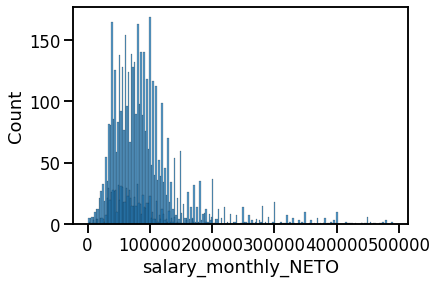

In [7]:
# Histogramas de las muestras que demuestran de forma grafica distribuciones normales debido al numero de muestras tomadas
seaborn.histplot(groupA, bins=200)
seaborn.histplot(groupB, bins=200)

**Conclusion**:

Podemos asegurar que existe un 95% de probabilidad de que el parametro poblacional (diferencia entre los salarios netos de hombre y otros generos) se encuentre dentro del intervalo definido entre los limites calculados: 

*   Limite inferior:  18560.5807418027
*   Limite superior:  27964.16605803376

La relacion de este intervalo con el test de hipotesis es principalmente que define justamente los limites de desviacion que vamos a tolerar para aceptar/rechazar una ${H{o}}$


## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=$ Los grupos A y B perciben los mismos salarios

$H_1=$ Los grupos A y B perdicen salarios distintos

**Estadístico (Pivote)**
  * Identificar el estadístico
Como primera observación, podemos destacar que el histograma analizado en el punto anterior tiene una distribución normal sesgada hacia la izquierda.

Se utilizará el Z-Score como estadístico, debido a que conocemos el tamaño de la muestra y es mayor a 30. Además, conocemos el valor de la desviación estandar de la población estudiada, por lo que también es recomendado usar el Z-Score, ya que se lo recomienda cuando n>30. 

$Z = (X - mu)/(sigma - sqr(n))$ es la fórmula que se utilizará para calcular el estadístico





In [8]:
n=60
#groupA.describe()
#groupB.describe()

muestra_a=groupA.sample(n, replace=False)
muestra_a_mean=muestra_a.mean()
muestra_a_std=muestra_a.std()


muestra_b=groupB.sample(n, replace=False)
muestra_b_mean=muestra_b.mean()
muestra_b_std=muestra_b.std()

#------------------------------------------------

#std_a=63890.59  #standard deviation de Group A
mean_a=93576.51 #media poblacional de Group A

#std_b=45867.54 #standard deviation de Group B
mean_b=76651.69 #media poblacional de Group B

#------------------------------------------------

Z_a = (muestra_a_mean - mean_a)/(muestra_a_std - numpy.sqrt(n) ) #puedo usar muestra_a_std porque n es mayor a 30
Z_b = (muestra_b_mean - mean_b)/(muestra_b_std - numpy.sqrt(n) )

print("el Z_A es = ", Z_a, "  y el Z_B es = ", Z_b)

el Z_A es =  -0.03190811300227415   y el Z_B es =  -0.06681890763613363


  * Escribir qué distribución tiene bajo $H_0$

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [9]:
from statsmodels.stats.power import tt_ind_solve_power

ModuleNotFoundError: No module named 'statsmodels'

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


- calcular y visualizar medias agrupadas por lenguaje para determinar posible edad de los lenguajes, asumiendo que lenguajes mas antiguos son desarrollados por programadores mas viejos y viceversa
- una vez determinadas las edades de los lenguajes, definimos grupos que nos permitan segmentar el analisis para los mismos
- analizamos la distribucion y medidas de centralizacion y dispersion de los salarios percibidos agrupados por genero y grupos de lenguajes para aquellos mas antiguos y aquellos mas recientes
- evaluamos resultados para intentar determinar si existio una evloucion en el mismo a traves de los años

In [83]:
# Eliminamos outliers para el analisis estableciendo maximos y minimos de salarios segun analisis anteriores
relevant_columns = ['profile_age', 'profile_gender', 'tools_programming_languages', 'salary_monthly_NETO']
limite_inferior = 5000
limite_superior = 500000
filtered_df = df.copy()
filtered_df = filtered_df[(limite_inferior< df['salary_monthly_NETO']) & (df['salary_monthly_NETO'] < limite_superior)]

In [84]:
# Usamos la funcion provista en clase para poder calcular frecuencia de lenguajes

# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
filtered_df.loc[:, 'cured_programming_languages'] = filtered_df\
    .tools_programming_languages.apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 
# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = filtered_df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(filtered_df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.

/var/folders/g3/60y3stx94570x_f9zydtwpsm0000gn/T/ipykernel_91487/463709342.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_lang = filtered_df.cured_programming_languages\


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


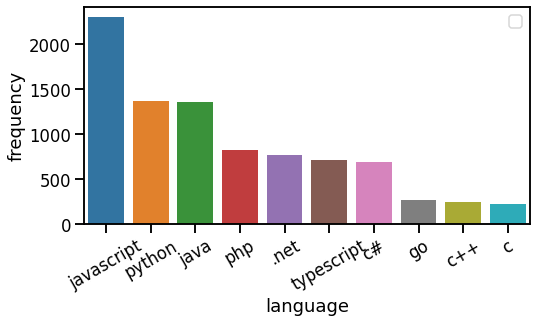

In [108]:
# Rankeamos los diferentes lenguajes por popularidad excluyendo los lenguajes que no nos importan
# debido principalmente a que no son estrictamente lenguajes sino herramientas o informacion basura

excluded_language = ['css', 'html', 'sql', 'bash/shell', 'ninguno', 'vba']
excluding_language = df_lang[~df_lang.programming_language.isin(excluded_language)]
language_count = excluding_language.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

min_usuaries = 200
interesting_languages = language_count['language'][language_count['frequency'] > min_usuaries]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]

# Graficamos su frecuencia lo cual refleja la popularidad del mismo
fig_popularidad = plt.figure(figsize=(8,4))
seaborn.barplot(x='language',  y='frequency', data=language_count[:10])
plt.xticks(rotation=30)
plt.legend(loc='upper right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


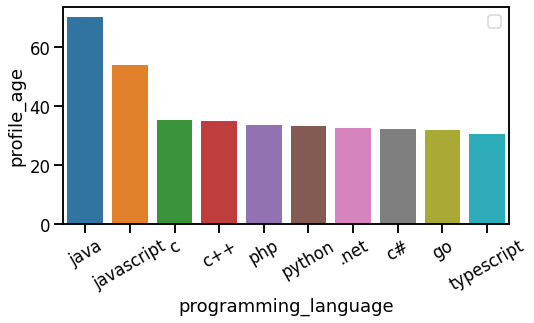

In [109]:
# Calculamos media de edades de programadores para los lenguages mas populares y los ordenamos para rankearlos
language_age_media = filtered_df_lang.groupby('programming_language')['profile_age'].mean()

sorted_language_age_media = language_age_media[:50].reset_index()\
     .rename(columns={'index': 'programming_language'}).sort_values('profile_age', ascending=False)

fig_age = plt.figure(figsize=(8,4))
seaborn.barplot(x="programming_language", y="profile_age", data=sorted_language_age_media, order=sorted_language_age_media.programming_language)
plt.xticks(rotation=30)
plt.legend(loc='upper right')


Este grafico nos dice que programadores con media de edad mas alta se concentran en lenguajes como java, javascript c, c++ y programadores con medias de edad mas baja (jovenes) en lenguajes de programacion como typescript, go o c#, lo cual se condice de alguna manera con los años de salida de los lenguajes.

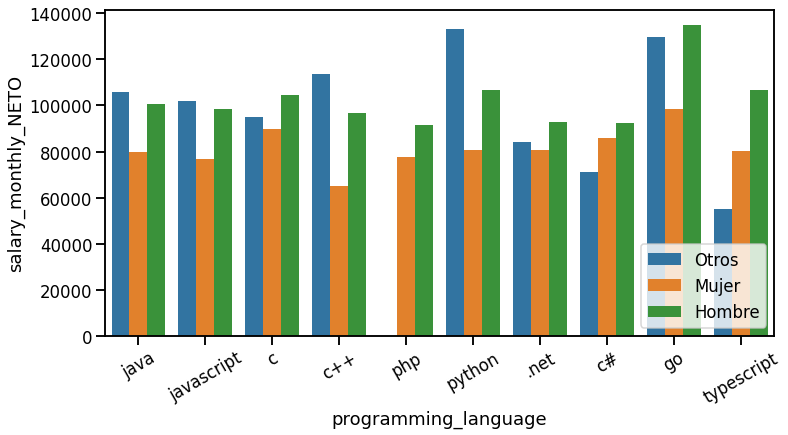

In [110]:
# Graficamos medias de salarios agrupados por genero y ordenados por los resultados anteriores

sorted_language_age_media.programming_language
language_salary_media = filtered_df_lang.groupby(['programming_language', 'profile_gender'])['salary_monthly_NETO'].mean()
# print(language_salary_media[:50].sort_values())

tmp = language_salary_media.reset_index()\
     .rename(columns={'index': 'programming_language'}).sort_values('salary_monthly_NETO')

fig_salary = plt.figure(figsize=(12,6))
seaborn.barplot(x="programming_language", y="salary_monthly_NETO", hue="profile_gender", data=tmp, order=sorted_language_age_media.programming_language)
plt.xticks(rotation=30)
plt.legend(loc='lower right')

A simple vista no se aprecian variaciones en los salarios discriminados por genero a traves de linea temporal que hemos propuesto en los pasos anteriores